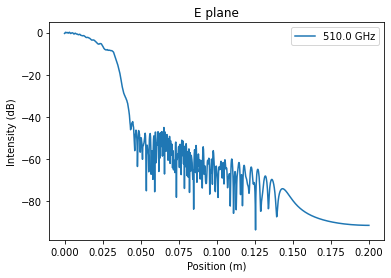

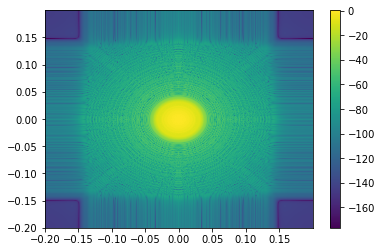

In [2]:
# From lens to primary...
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm
tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
secondary_obj = poppy.QuadraticLens(f_lens=f_2)
primary_obj = poppy.QuadraticLens(f_lens=f_1)

# separations 
d_lens_3 = 33.06 * u.cm
d_3_2 = 86.562 * u.cm
d_2_1 = 104.995 * u.cm

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]
for ff in ffs:
    ll = const.c/ff

    wf = poppy.FresnelWavefront(beam_radius=10 * u.cm, wavelength=ll)

    tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
    secondary_obj = poppy.QuadraticLens(f_lens=f_2)
    primary_obj = poppy.QuadraticLens(f_lens=f_1)
    
    lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
    wf *= lenslet_aperture

    ring = poppy.CircularAperture(radius=0.0381*u.m)
    wf *= ring
    y, x = wf.coordinates()
    initial_power=np.sum(wf.intensity)

    wf.propagate_fresnel(0.635*u.cm)

    # 3 groups of 0.635 cm spaced baffles, each 2.8 cm apart
    for dummyvar in np.arange(1,4):
        for dummyvar2 in np.arange(1,4):
            wf *= ring    
            wf.propagate_fresnel(0.635*u.cm)
        wf *= ring
        wf.propagate_fresnel(2.8*u.cm)
    
    # top group of 9 baffles which are 1 mm wider but still 0.635 cm apart
    ring = poppy.CircularAperture(radius=0.0382*u.m)
    for dummyvar in np.arange(1,9):
        wf *= ring    
        wf.propagate_fresnel(0.635*u.cm)
    wf *= ring    

    wf.propagate_fresnel(14.1455*u.cm) # propogate out to center of tertiary

    wf *= tertiary_obj
    
    # add baffle at IF
    wf.propagate_fresnel(d_3_2)
    
    wf *= secondary_obj
    
    wf.propagate_fresnel(d_2_1)
    
    # process output
    #temp = wf.intensity
    #spill_power, trans_power = 0, 0
    #for m in np.arange(0,2048,dtype=int):
    #    for n in np.arange(0,2048,dtype=int):
    #        if (0.05)**2 < x[m,n]**2 + y[m,n]**2 :
    #            spill_power += temp[m,n]  
    #        else:
    #            trans_power += temp[m,n]

    #print('% Power transmitted @ '+str(ff)+':')
    #print(str(100*trans_power/initial_power)+'%')
    #print('% Power spilled @ '+str(ff)+':')
    #print(str(100*spill_power/initial_power)+'%')            
            
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(ff))

plt.legend()    
plt.title("E plane")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
plt.show()

a=0 # Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
fig.colorbar(c,ax=ax)
plt.show()

In [20]:
# what radius on the primary cooresponds to 15 deg ?
import numpy as np
from math import pi
r=(86.562+104.995)*np.tan(15*pi/180)
print(r)

51.32754345452857
